In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


**Load data**

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


**1. Autoencoder with extra hidden layers**

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)  # bottleneck

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



**Train autoencoder**

In [ ]:
history = autoencoder.fit(x_train, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.4564 - val_loss: 0.3146
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.3088 - val_loss: 0.3022
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.2990 - val_loss: 0.2963
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.2934 - val_loss: 0.2941
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.2903 - val_loss: 0.2903
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2877 - val_loss: 0.2884
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.2854 - val_loss: 0.2867
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.2831 - val_loss: 0.2852
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2828 - val_loss: 0.2843
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.2821 - val_loss: 0.2832


**2. Predict & visualize**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


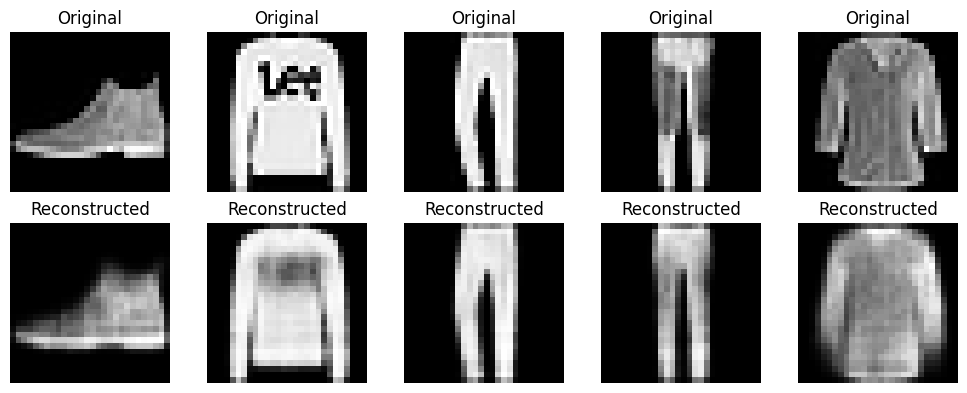

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()


**3. Denoising Autoencoder**

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.4701 - val_loss: 0.3353
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.3287 - val_loss: 0.3224
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.3183 - val_loss: 0.3168
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3126 - val_loss: 0.3121
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.3086 - val_loss: 0.3098
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3060 - val_loss: 0.3072
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.3045 - val_loss: 0.3066
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.3029 - val_loss: 0.3060
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3024 - val_loss: 0.3039
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.3008 - val_loss: 0.3031
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


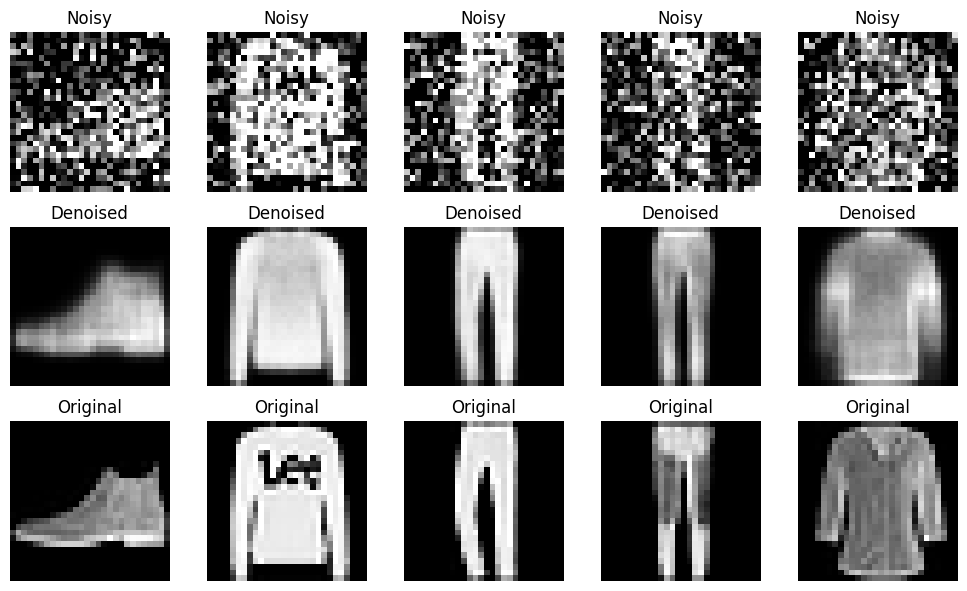

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Create same architecture for denoising autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

denoise_autoencoder = Model(input_img, decoded)
denoise_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train denoising autoencoder
denoise_history = denoise_autoencoder.fit(x_train_noisy, x_train,
                                          epochs=10,
                                          batch_size=256,
                                          shuffle=True,
                                          validation_data=(x_test_noisy, x_test))

# Predict and visualize denoising output
denoised_imgs = denoise_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(10, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Ground truth
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
plt.tight_layout()
plt.show()


 4. Plot training/validation los

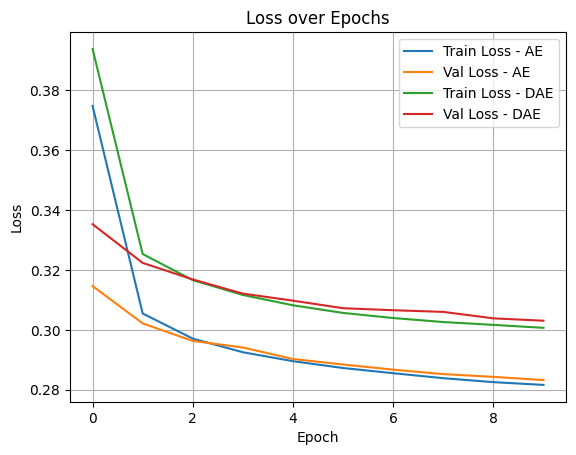

In [ ]:
plt.plot(history.history['loss'], label='Train Loss - AE')
plt.plot(history.history['val_loss'], label='Val Loss - AE')
plt.plot(denoise_history.history['loss'], label='Train Loss - DAE')
plt.plot(denoise_history.history['val_loss'], label='Val Loss - DAE')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

https://drive.google.com/file/d/1h4GTMU3MpE5Y52Vo34GWKdVQdtorUqU7/view?usp=sharing